1/1 [==============================] - 1s 583ms/step


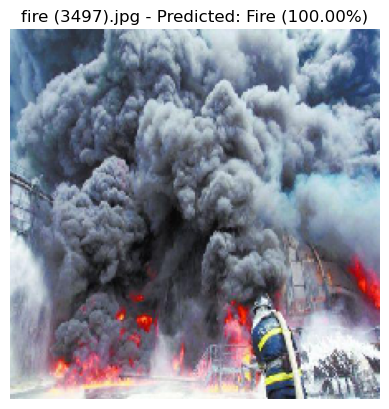

Predicted Class: Fire (Probability: 100.00%)


In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import keras.models
import numpy as np
# Load the model
#model = keras.models.load_model('Modified_MobileNetV2_based_fire_detection_model.h5')
#model = keras.models.load_model('Modified_InceptionV3_based_fire_detection_model.h5')
model = keras.models.load_model('Modified_ResNet50_based_fire_detection_model.h5')
#model = keras.models.load_model('modified VGG19 based fire detection model.h5')
# Define functions for loading and preprocessing (adjust based on your model)
def load_and_preprocess_image(image_path, target_size=(224, 224)):
  img = image.load_img(image_path, target_size=target_size)
  img = image.img_to_array(img)
  img = img / 255.0  # Normalize pixel values (assuming range 0-255)
  return np.expand_dims(img, axis=0)  # Add an extra dimension for batch processing

# Define class labels based on your model (replace with your actual class labels)
class_labels = ["Fire", "Non-Fire"]

# Path to the new image
new_image_path = 'E:/Thesis/New folder/Test/Fire/fire (3497).jpg'
#new_image_path = 'E:/Thesis/New folder/Test/Non-fire/Non-fire (76).jpg'



# Load and preprocess the new image
new_image = load_and_preprocess_image(new_image_path)

# Make prediction on the preprocessed new image
prediction = model.predict(new_image)

# Access the predicted class probabilities and index
predicted_class_probabilities = prediction[0]
predicted_class_index = np.argmax(predicted_class_probabilities)

# Get the predicted class label and probability
predicted_class = class_labels[predicted_class_index]
predicted_probability = predicted_class_probabilities[predicted_class_index] * 100

# Display the new image with predicted class
plt.imshow(new_image[0])  # Assuming RGB format
plt.title(f"{new_image_path.split('/')[-1]} - Predicted: {predicted_class} ({predicted_probability:.2f}%)")
plt.axis('off')
plt.show()

print(f"Predicted Class: {predicted_class} (Probability: {predicted_probability:.2f}%)")


In [5]:
import cv2
import numpy as np
import tensorflow as tf
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from tkinter import ttk

# Load the pre-trained model

#model = tf.keras.models.load_model('Modifeid_ResNet50_based_fire_detection_model.h5')
#model = tf.keras.models.load_model('Modified._InceptionV3_based_fire_detection_model.h5')
#model = tf.keras.models.load_model('modified VGG19 based fire detection model.h5')
#model = tf.keras.models.load_model('Modified_MobileNetV2_based_fire_detection_model.h5')


#model = keras.models.load_model('Modified_MobileNetV2_based_fire_detection_model.h5')
#model = keras.models.load_model('Modified_InceptionV3_based_fire_detection_model.h5')
model = tf.keras.models.load_model('Modified_ResNet50_based_fire_detection_model.h5')
#model = keras.models.load_model('modified VGG19 based fire detection model.h5')
# Function to preprocess the frame for prediction
def preprocess_frame(frame):
    img_size = 224  # Example image size for the model
    frame_resized = cv2.resize(frame, (img_size, img_size))
    frame_normalized = frame_resized / 255.0
    frame_expanded = np.expand_dims(frame_normalized, axis=0)
    return frame_expanded

# Function to detect fire in the frame using the model
def detect_fire(frame):
    processed_frame = preprocess_frame(frame)
    prediction = model.predict(processed_frame)
    fire_confidence = prediction[0][0]
    non_fire_confidence = 1 - fire_confidence
    return fire_confidence, non_fire_confidence

# Function to load image or video file
def load_media():
    global cap, media_type, loaded_image
    media_path = filedialog.askopenfilename(filetypes=[("Media Files", "*.mp4 *.avi *.mov *.jpg *.jpeg *.png")])
    if media_path:
        if media_path.lower().endswith(('.mp4', '.avi', '.mov')):
            cap = cv2.VideoCapture(media_path)
            media_type = 'video'
            loaded_image = None
        else:
            loaded_image = cv2.imread(media_path)
            media_type = 'image'
        detect_button.config(state=NORMAL)
        stop_button.config(state=NORMAL)

# Function to process video frames or a single image
def process_media():
    global stop
    stop = False
    if media_type == 'image' and loaded_image is not None:
        frame = loaded_image
        
        fire_confidence, non_fire_confidence = detect_fire(frame)
        
        label = "Fire" if fire_confidence > 0.5 else "Non-Fire"
        color = (0, 0, 255) if fire_confidence > 0.5 else (0, 255, 0)
        cv2.putText(frame, f'{label} (Fire: {fire_confidence:.2f}, Non-Fire: {non_fire_confidence:.2f})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        
        cv2.imshow('Fire Detection', frame)
        cv2.waitKey(0)  # Wait for a key press to close the image window
        cv2.destroyAllWindows()
    elif media_type == 'video':
        while cap.isOpened() and not stop:
            ret, frame = cap.read()
            if not ret:
                break
            
            fire_confidence, non_fire_confidence = detect_fire(frame)
            
            label = "Fire" if fire_confidence > 0.5 else "Non-Fire"
            color = (0, 0, 255) if fire_confidence > 0.5 else (0, 255, 0)
            cv2.putText(frame, f'{label} (Fire: {fire_confidence:.2f}, Non-Fire: {non_fire_confidence:.2f})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            
            cv2.imshow('Fire Detection', frame)
            
            if cv2.waitKey(30) & 0xFF == ord('q'):
                break
        
        cap.release()
        cv2.destroyAllWindows()
    elif media_type == 'webcam':
        while cap.isOpened() and not stop:
            ret, frame = cap.read()
            if not ret:
                break
            
            fire_confidence, non_fire_confidence = detect_fire(frame)
            
            label = "Fire" if fire_confidence > 0.5 else "Non-Fire"
            color = (0, 0, 255) if fire_confidence > 0.5 else (0, 255, 0)
            cv2.putText(frame, f'{label} (Fire: {fire_confidence:.2f}, Non-Fire: {non_fire_confidence:.2f})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            
            cv2.imshow('Fire Detection', frame)
            
            if cv2.waitKey(30) & 0xFF == ord('q'):
                break
        
        cap.release()
        cv2.destroyAllWindows()

# Function to start webcam
def start_webcam():
    global cap, media_type
    cap = cv2.VideoCapture(0)
    media_type = 'webcam'
    detect_button.config(state=NORMAL)
    stop_button.config(state=NORMAL)
    process_media()

# Function to stop processing media
def stop_processing():
    global stop
    stop = True
    detect_button.config(state=DISABLED)
    stop_button.config(state=DISABLED)
    cv2.destroyAllWindows()

# Function to quit application
def quit_app():
    stop_processing()
    root.quit()

# Setting up the GUI
root = Tk()
root.title("Fire Detection System")
root.geometry("400x250")
root.configure(bg='#2c3e50')

style = ttk.Style()
style.configure('TButton', font=('Arial', 12), padding=10)

# Adding a title label
title_label = Label(root, text="Fire Detection System", font=('Arial', 16, 'bold'), bg='#2c3e50', fg='green')
title_label.pack(pady=20)

# Adding buttons with improved styles
load_button = ttk.Button(root, text="Load Image/Video", command=load_media)
load_button.pack(pady=10)

webcam_button = ttk.Button(root, text="Start Webcam", command=start_webcam)
webcam_button.pack(pady=10)

detect_button = ttk.Button(root, text="Detect Fire", command=process_media, state=DISABLED)
detect_button.pack(pady=10)

stop_button = ttk.Button(root, text="Stop Detection", command=stop_processing, state=DISABLED)
stop_button.pack(pady=10)

quit_button = ttk.Button(root, text="Quit", command=quit_app)
quit_button.pack(pady=10)

root.mainloop()


1/1 [==============================] - 0s 329ms/step


In [3]:
"""Adjustable parameters"""
model = "Modified_ResNet50_basedfire_detection_model.h5"  # path to model save file
result_directory = "E:/Thesis/Dataset/Resenet50/0111" # test result save directory
# paths to positive and negative labeled images
pos_path = r"E:/Thesis/Dataset/Test/Fire"
neg_path = r"E:/Thesis/Dataset/Test/Non-fire"

prediction_threshold = .5
image_size = (224, 224)
"""End adjustable parameters"""

'End adjustable parameters'

In [4]:
import os
os.makedirs(result_directory, exist_ok=True) # Check result_directory exists

In [5]:
from tensorflow import keras
test_data = keras.utils.image_dataset_from_directory(
    directory="E:/Thesis/Dataset/Test",
    labels="inferred",
    label_mode="binary",
    color_mode="rgb",
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1650 files belonging to 2 classes.


In [6]:
actual = []  # list for actual labels
predicted = []  # list for predicted labels
FalsePos = []  # list for missed image file names to save
FalseNeg = []  # list for missed image file names to save
ConfidenceScores = []  # list for confidence scores for each prediction

# Keras built in evaluation
reconstructed_model = keras.models.load_model(model)
eval_loss, eval_acc = reconstructed_model.evaluate(test_data)
print(f"Evaluation accuracy {eval_acc}, Evaluation loss {eval_loss}")

52/52 [==============================] - 278s 5s/step - loss: 0.0510 - accuracy: 0.9885
Evaluation accuracy 0.9884848594665527, Evaluation loss 0.05095670372247696


In [7]:
import os
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import csv
for pos_image in os.listdir(pos_path):
    image_path = pos_path + "/" + pos_image
    pos_image = keras.preprocessing.image.load_img(image_path, target_size=image_size)
    pos_image = keras.preprocessing.image.img_to_array(pos_image)
    pos_image = np.expand_dims(pos_image, axis=0)
    prediction = reconstructed_model.predict(pos_image)
    actual.append("1")
    ConfidenceScores.append(((1 - prediction[0][0] * 100), image_path))
    if prediction[0][0] < 0.5:
        predicted.append("1")
    else:
        FalseNeg.append(image_path)
        predicted.append("0")

for neg_image in os.listdir(neg_path):
    image_path = neg_path + "/" + neg_image
    neg_image = keras.preprocessing.image.load_img(image_path, target_size=image_size)
    neg_image = keras.preprocessing.image.img_to_array(neg_image)
    neg_image = np.expand_dims(neg_image, axis=0)
    prediction = reconstructed_model.predict(neg_image)
    actual.append("0")
    ConfidenceScores.append(((prediction[0][0] * 100), image_path))
    if prediction[0][0] > 0.5:
        predicted.append("0")
    else:
        FalsePos.append(image_path)
        predicted.append("1")


1/1 [==============================] - 0s 325ms/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 218ms/step


1/1 [==============================] - 0s 253ms/step


1/1 [==============================] - 0s 231ms/step


1/1 [==============================] - 0s 239ms/step


1/1 [==============================] - 0s 486ms/step


1/1 [==============================] - 0s 305ms/step


1/1 [==============================] - 0s 299ms/step


1/1 [==============================] - 0s 300ms/step


In [8]:
import os
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import csv
# Create CSV with missed image paths
with open(os.path.join(result_directory, "missed.csv"), "w", newline="") as file:
    writer = csv.writer(file)
    for image in FalsePos:
        writer.writerow([image])
    for image in FalseNeg:
        writer.writerow([image])

# create CSV with confidence (prediction) scores
with open(os.path.join(result_directory, "ConfidenceScores.csv"), "w", newline="") as file:
    writer = csv.writer(file)
    for score in ConfidenceScores:
        writer.writerow(score)
# ... (previous code)

# After processing all images, check if the lengths are equal
if len(actual) != len(predicted):
    # Determine which list is shorter
    shorter_length = min(len(actual), len(predicted))
    # Truncate the longer list to match the shorter one
    actual = actual[:shorter_length]
    predicted = predicted[:shorter_length]


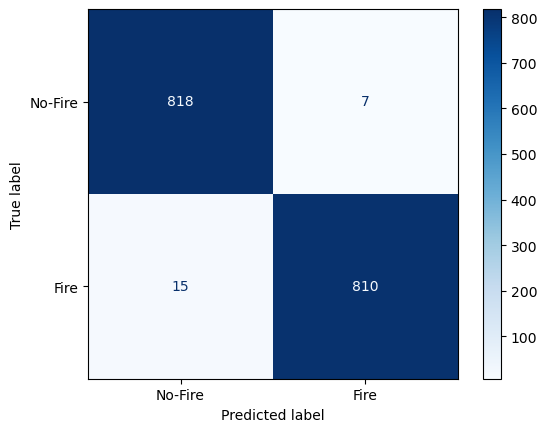

In [9]:
# Now you can proceed with creating the confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["No-Fire", "Fire"])
cm_display.plot(cmap="Blues")
plt.savefig(os.path.join(result_directory, "CM.jpg"))

In [10]:
# Create CSV with performance metrics
with open(os.path.join(result_directory, "metrics.csv"), "w", newline="") as file:
    file.write(f"Accuracy: {(metrics.accuracy_score(actual,predicted))}\n")
    file.write(f"f1-score: {metrics.f1_score(actual,predicted,pos_label='1')}\n")
    file.write(f"Precision: {metrics.precision_score(actual, predicted, pos_label='1')}\n")
    file.write(f"Recall: {metrics.recall_score(actual,predicted, pos_label='1')}\n")

In [11]:
print(f"Accuracy: {(metrics.accuracy_score(actual,predicted))}")
print(f"f1-score: {metrics.f1_score(actual,predicted,pos_label='1')}")
print(f"Precision: {metrics.precision_score(actual, predicted, pos_label='1')}")
print(f"Recall: {metrics.recall_score(actual,predicted, pos_label='1')}")

Accuracy: 0.9866666666666667
f1-score: 0.9866017052375152
Precision: 0.9914320685434517
Recall: 0.9818181818181818
